In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score

In [20]:
# Load the NVDA stock dataset (assume a CSV file named 'NVDA_stock.csv')
df = pd.read_csv('NVDA.csv')

In [21]:
# Display basic information about the dataset
print(df.head())
print(df.info())
print(df.describe())

         Date  Adj Close      Close       High     Low       Open     Volume
0  28/11/2022  15.812541  15.827000  16.357000  15.725  16.025999  303741000
1  29/11/2022  15.624713  15.639000  15.932000  15.520  15.827000  298384000
2  30/11/2022  16.911863  16.923000  16.930000  15.597  15.697000  565298000
3  01/12/2022  17.123726  17.135000  17.264999  16.635  16.999001  470977000
4  02/12/2022  16.864895  16.875999  16.933001  16.445  16.659000  371389000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       503 non-null    object 
 1   Adj Close  503 non-null    float64
 2   Close      503 non-null    float64
 3   High       503 non-null    float64
 4   Low        503 non-null    float64
 5   Open       503 non-null    float64
 6   Volume     503 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.6+ KB
None
      

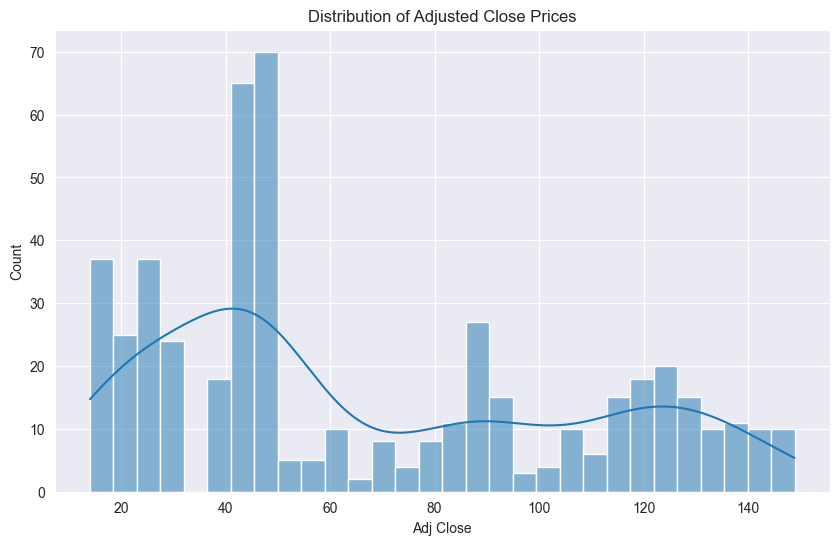

In [22]:
# Visualizing distributions of numerical features
plt.figure(figsize=(10, 6))
sns.histplot(df['Adj Close'], bins=30, kde=True)
plt.title('Distribution of Adjusted Close Prices')
plt.show()

In [23]:
# Checking for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [24]:
# Dropping the 'Date' column as it's not useful for clustering
df.drop(columns=['Date'], inplace=True)

In [25]:
# Standardizing the features to have mean = 0 and variance = 1
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [26]:
# Finding the optimal number of clusters using the Elbow method
wcss = []  # Within-cluster sum of squares
K = range(1, 20)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

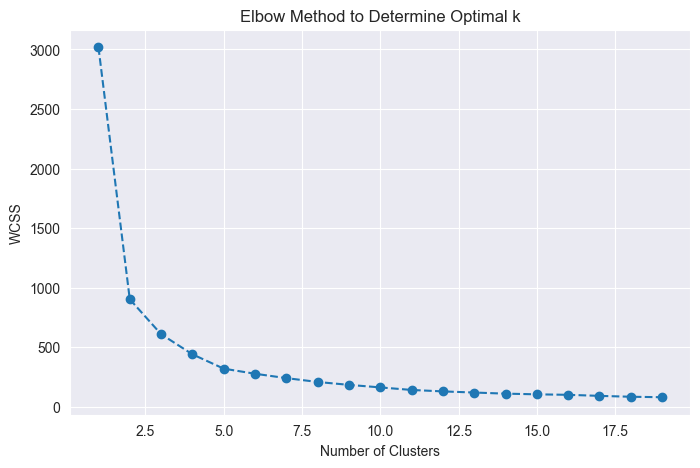

In [27]:
# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

In [28]:
# Cross-validation with multiple values of k
silhouette_scores = {}
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(df_scaled)
    silhouette_scores[k] = silhouette_score(df_scaled, clusters)

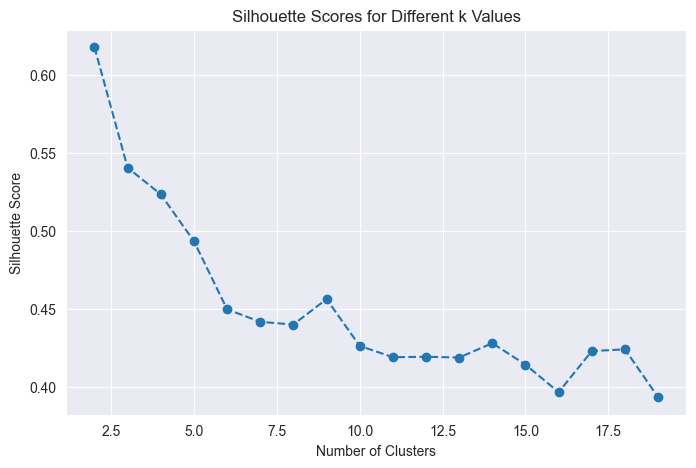

In [29]:
# Plot silhouette scores for different k values
plt.figure(figsize=(8, 5))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k Values')
plt.show()

In [30]:
# Selecting the best k based on silhouette scores
k_optimal = max(silhouette_scores, key=silhouette_scores.get)
print(f'Optimal number of clusters based on Silhouette Score: {k_optimal}')

Optimal number of clusters based on Silhouette Score: 2


In [31]:
# Apply K-Means clustering with the chosen k
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)

In [32]:
# Adding cluster labels to the dataframe
df['Cluster'] = clusters

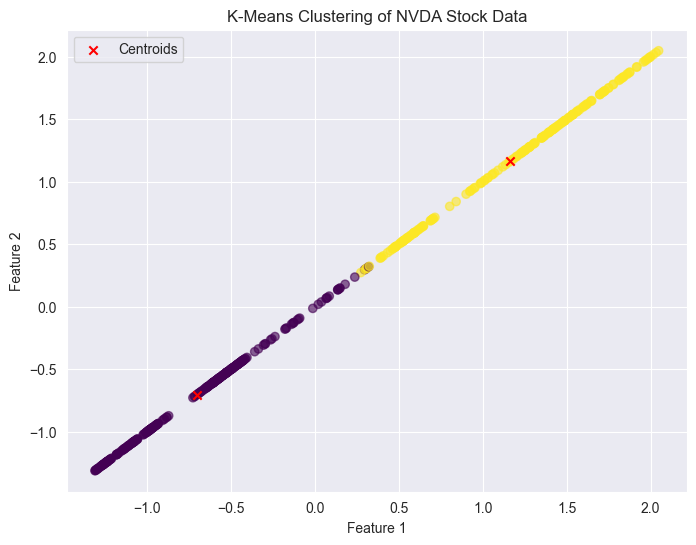

In [33]:
# Visualizing clusters (using first two principal components for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering of NVDA Stock Data')
plt.legend()
plt.show()

In [34]:
# Interpretation of Results
print("Clusters were identified in the stock data based on the given features.")
print("A silhouette score closer to 1 indicates well-separated clusters.")
print("Further analysis can be done by investigating how these clusters relate to market trends.")

Clusters were identified in the stock data based on the given features.
A silhouette score closer to 1 indicates well-separated clusters.
Further analysis can be done by investigating how these clusters relate to market trends.
